# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [4]:
install.packages("glmnet")
library(glmnet)
library(tidyverse)
library(ggplot2)

Warning message:
"package 'glmnet' is in use and will not be installed"


We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [5]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [38]:
# WRITE YOUR CODE HERE
#length(y)
#typeof(y)

trainy = sample(y, size = 50, replace = FALSE)
trainx = sample(x, size = 50, replace = FALSE)
train = data.frame(x = trainx, y = trainy) # defines train

head(train)

testy = sample(y, size = 51, replace = FALSE)
testx = sample(x, size = 51, replace = FALSE)
test = data.frame(x = testx, y = testy)

head(test)

,x,y
,<dbl>,<dbl>
1,1.62,1.7430629
2,-1.80,1.5154726
3,8.28,2.0148737
4,5.94,0.2112119
5,7.74,0.2369539
6,-7.02,1.5256458


,x,y
,<dbl>,<dbl>
1,-0.18,0.2132742
2,8.10,2.4078645
3,3.96,1.8210194
4,-8.82,1.1226488
5,1.44,0.4207930
6,6.66,0.6696763


(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

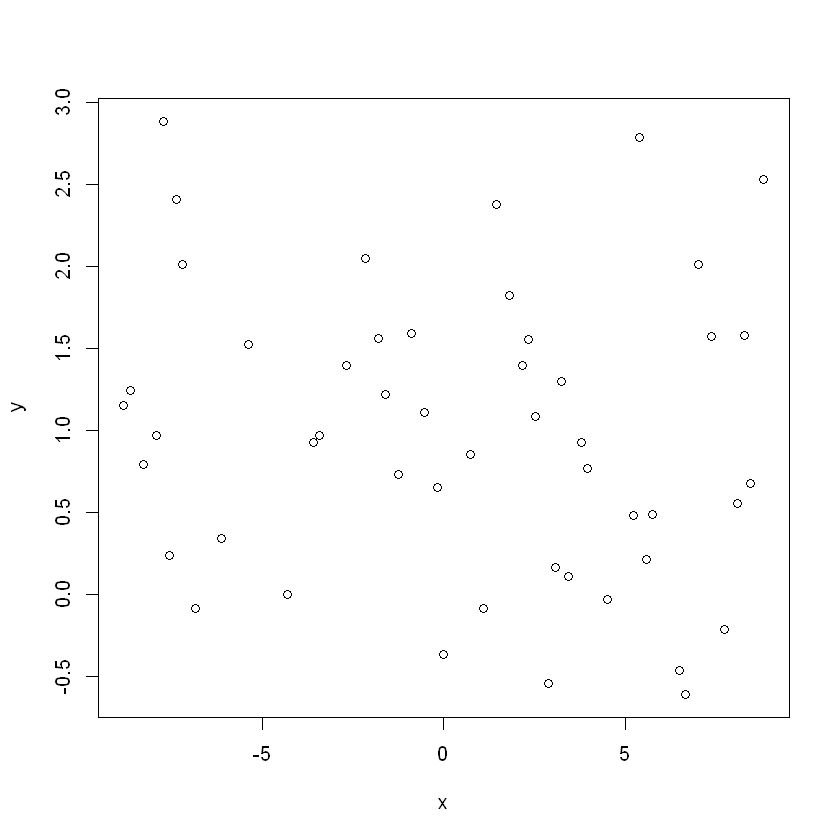

In [34]:
# WRITE YOUR CODE HERE
plot(train)

How would you describe the relationship between $x$ and $y$ based on this plot?

> *Weakly correlated, appears to be positive.*
> 

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

In [41]:
# WRITE YOUR CODE HERE
lm.fit = lm(train$x~poly(y,4), data=train)
lm.fit

ggplot(train(aes(x,y)))


Call:
lm(formula = train$x ~ poly(y, 4), data = train)

Coefficients:
(Intercept)  poly(y, 4)1  poly(y, 4)2  poly(y, 4)3  poly(y, 4)4  
     0.9432      -2.6523       8.7537       0.2962      -9.3764  


How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> *Write your response here*
> 

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

In [ ]:
# WRITE YOUR CODE HERE



> *Write your response here* 
> 

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

In [ ]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    
}

# Plot your results here
# WRITE YOUR CODE HERE


What do you see as $k$ increase?

> *Write your response here* 
> 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



In [ ]:
# WRITE YOUR CODE HERE



What do you see as $k$ gets larger than $n$?

> *Write your response here* 
> 

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

In [ ]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    
}

# Plot your results here
# WRITE YOUR CODE HERE


What happens now when $k$ gets larger than $n$?

> *Write your response here* 
> 

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Write your response here* 
> 

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here* 
> 

**DUE:** 5pm EST, April 12, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*